In [1]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2020-08-29 11:30:25--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 172.67.213.166, 104.31.81.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.05s   

2020-08-29 11:30:25 (9.39 MB/s) - ‘spam.csv’ saved [503663/503663]



In [3]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.columns = ['labels','messages']

In [7]:
df.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df['b_labels'] =df['labels'].map({'ham':0,'spam':1})
df.head()

,labels,messages,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
from sklearn.model_selection import train_test_split
data_train, data_test, y_train, y_test = train_test_split(df['messages'],df['b_labels'].values, test_size = 0.33) 

In [10]:
# Tokenization (convert sentence to sequence)
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(data_train)
sequences_train = tokenizer.texts_to_sequences(data_train)
sequences_test = tokenizer.texts_to_sequences(data_test)

In [11]:
# dimensions for our model
word2idx = tokenizer.word_index
V = len(word2idx)

# data to train
df_train = pad_sequences(sequences_train)
T = df_train.shape[1]

#data to test
df_test = pad_sequences(sequences_test,maxlen=T)

# We get to choose embedding dimensionality
D = 20

# Hidden state dimensionality
M = 15

In [13]:
# Building our model
i = Input(shape=(T,))
x = Embedding(V+1,D)(i)
x = LSTM(M,return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1,activation='sigmoid')(x)

model = Model(i,x)

# Compile our model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit the model
r = model.fit(df_train, y_train, epochs = 10, validation_data=(df_test, y_test))

Epoch 1/10
117/117 [==============================] - 9s 79ms/step - loss: 0.4452 - accuracy: 0.8671 - val_loss: 0.3888 - val_accuracy: 0.8635
Epoch 2/10
117/117 [==============================] - 9s 76ms/step - loss: 0.3532 - accuracy: 0.8671 - val_loss: 0.3893 - val_accuracy: 0.8635
Epoch 3/10
117/117 [==============================] - 9s 73ms/step - loss: 0.2638 - accuracy: 0.8671 - val_loss: 0.2469 - val_accuracy: 0.8635
Epoch 4/10
117/117 [==============================] - 9s 75ms/step - loss: 0.1609 - accuracy: 0.9341 - val_loss: 0.1583 - val_accuracy: 0.9685
Epoch 5/10
117/117 [==============================] - 9s 76ms/step - loss: 0.0968 - accuracy: 0.9898 - val_loss: 0.1356 - val_accuracy: 0.9679
Epoch 6/10
117/117 [==============================] - 9s 75ms/step - loss: 0.0668 - accuracy: 0.9936 - val_loss: 0.1239 - val_accuracy: 0.9690
Epoch 7/10
117/117 [==============================] - 9s 74ms/step - loss: 0.0507 - accuracy: 0.9954 - val_loss: 0.1163 - val_accuracy: 0.9652

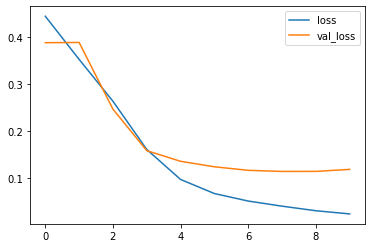

In [14]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

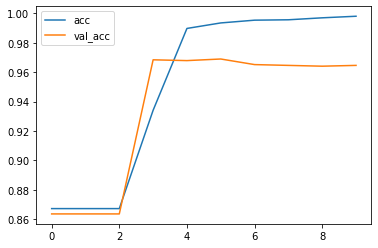

In [15]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()